<a href="https://colab.research.google.com/github/gianerr/CSST-102/blob/main/3B_PLATA_MP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Exploration and Visualization

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
data = pd.read_csv('datasets_house_prices.csv')

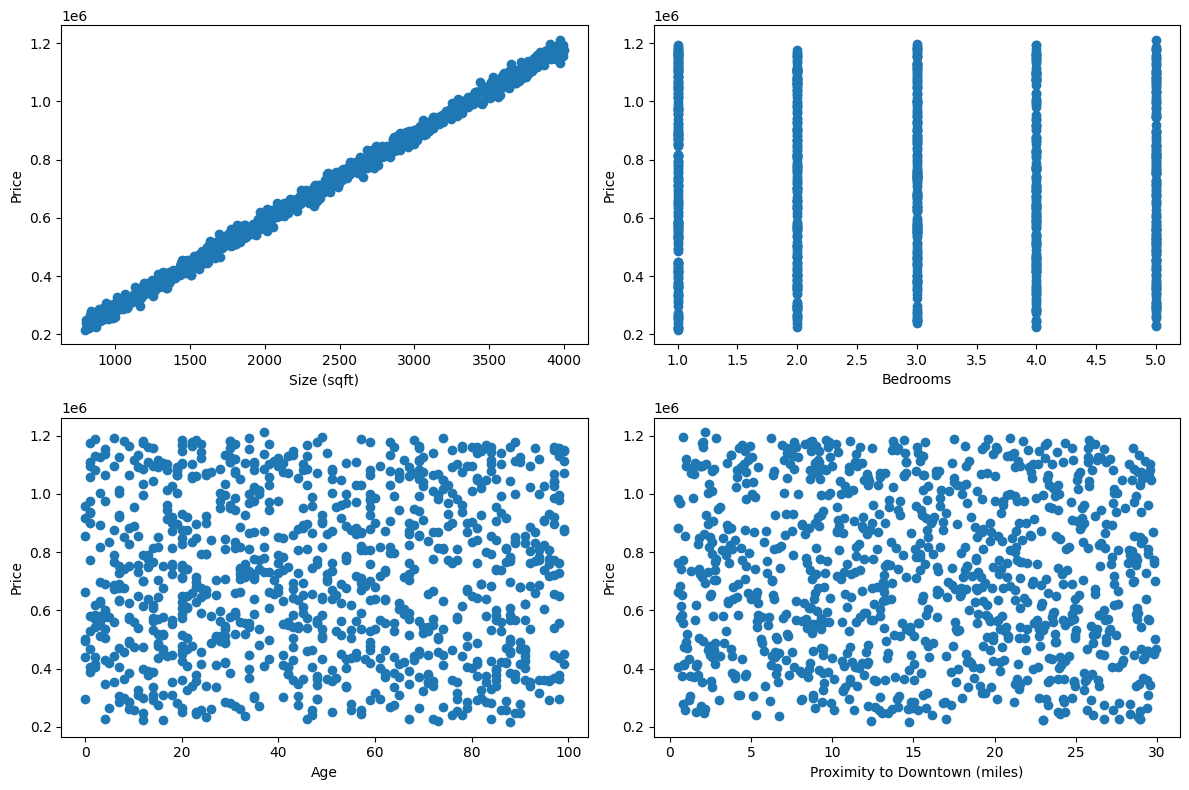

In [17]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(data['Size (sqft)'], data['Price'])
plt.xlabel('Size (sqft)')
plt.ylabel('Price')

plt.subplot(2, 2, 2)
plt.scatter(data['Bedrooms'], data['Price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.subplot(2, 2, 3)
plt.scatter(data['Age'], data['Price'])
plt.xlabel('Age')
plt.ylabel('Price')

plt.subplot(2, 2, 4)
plt.scatter(data['Proximity to Downtown (miles)'], data['Price'])
plt.xlabel('Proximity to Downtown (miles)')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [18]:
corr_matrix = data.corr()
print(corr_matrix['Price'])

Size (sqft)                      0.998368
Bedrooms                        -0.053304
Age                              0.006756
Proximity to Downtown (miles)   -0.029580
Price                            1.000000
Name: Price, dtype: float64


# 2. Data Preprocessing

In [19]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']])
data['Size (sqft)_norm'] = data_normalized[:, 0]
data['Bedrooms_norm'] = data_normalized[:, 1]
data['Age_norm'] = data_normalized[:, 2]
data['Proximity to Downtown (miles)_norm'] = data_normalized[:, 3]

# 3. Model Development

In [20]:
X = data[['Size (sqft)_norm', 'Bedrooms_norm', 'Age_norm', 'Proximity to Downtown (miles)_norm']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 4. Model Evaluation

In [22]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Adjusted R-squared: {adjusted_r2:.2f}')

Mean Squared Error: 100214724.63
R-squared: 1.00
Adjusted R-squared: 1.00


In [23]:
print(f'Intercept: {model.intercept_:.2f}')
print('Coefficients:')
for i, feature in enumerate(['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']):
    print(f'{feature}: {model.coef_[i]:.2f}')

Intercept: 718607.77
Coefficients:
Size (sqft): 278975.29
Bedrooms: 6804.52
Age: -6082.94
Proximity to Downtown (miles): -8459.85


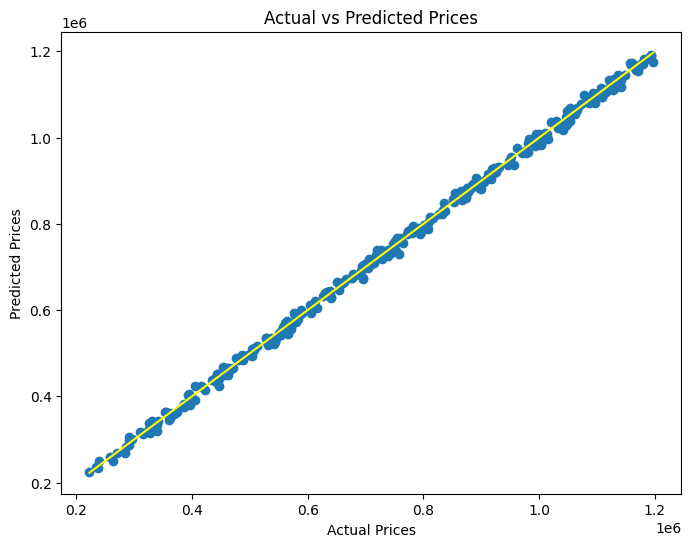

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='yellow')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# CONCLUSION

In [27]:
conclusion = """ In conclusion, the multiple linear regression model effectively
predicts house prices based on size, bedrooms, age, and proximity to downtown.
The model's performance metrics and visualizations demonstrate its ability to
capture the relationships between the features and the target variable."""
print(conclusion)

 In conclusion, the multiple linear regression model effectively 
predicts house prices based on size, bedrooms, age, and proximity to downtown. 
The model's performance metrics and visualizations demonstrate its ability to 
capture the relationships between the features and the target variable.
